In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import joypy
from scipy.stats import iqr

In [ ]:
#Dùng để trích xuất mã tỉnh từ mã hs
def extract_prefix(candidate_id):
    if len(str(candidate_id)) == 7:
        return int(str(candidate_id)[:1])  
    elif len(str(candidate_id)) == 8:
        return int(str(candidate_id)[:2]) 
    else:
        return None 

#### Điểm môn thi

In [ ]:
df_score_1 = pd.read_csv('vnhsge-2018_score_1.csv')
df_score_2 = pd.read_csv('vnhsge-2018_score_2.csv')
df_province_region = pd.read_csv('vnhsge_province_region.csv')

# Merge score dataframes
df_score = pd.concat([df_score_1, df_score_2]).drop_duplicates()
# pd.concat dùng để nối dataframes, drop_duplicates dùng để loại bỏ các dòng trùng lặp

# Filter and sort score data
df_score = df_score[df_score['score'] > 0] 
df_score = df_score.sort_values(by=['is_chosen', 'subject_id'], ascending=False)
#ascending=False: sắp xếp thep thứ tự giảm dần

# Add province code
df_score['province_code'] = df_score['candidate_id'].apply(extract_prefix)

# Merge with province and region data
merged_df = pd.merge(df_score, df_province_region, on='province_code', how='inner')
#CHỉ giữ lại các giá trị giao nhau ở df_score, df_province_region

# Select relevant columns
merged_df = merged_df[['candidate_id', 'subject_id', 'score', 'is_chosen', 'province_name', 'er_code', 'region']]

# Display the resulting dataframe
merged_df.head()

,candidate_id,subject_id,score,is_chosen,province_name,er_code,region
0,1000019,Van,5.75,1,Hà Nội,1,Thành phố trực thuộc trung ương
1,1000020,Van,8.25,1,Hà Nội,1,Thành phố trực thuộc trung ương
2,1000021,Van,8.00,1,Hà Nội,1,Thành phố trực thuộc trung ương
3,1000022,Van,6.50,1,Hà Nội,1,Thành phố trực thuộc trung ương
4,1000023,Van,6.75,1,Hà Nội,1,Thành phố trực thuộc trung ương


<Figure size 640x480 with 0 Axes>

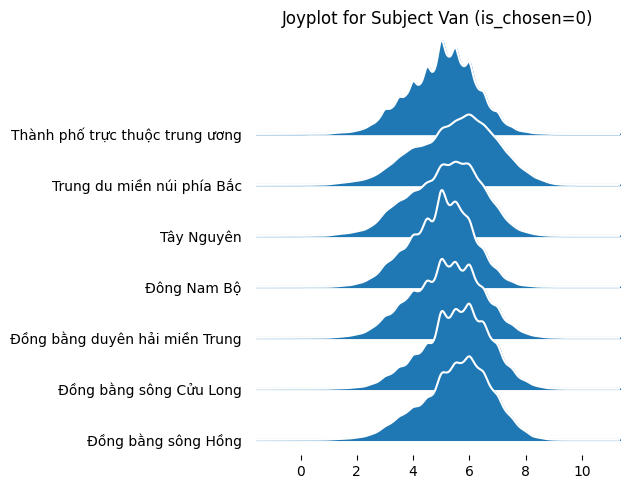

<Figure size 640x480 with 0 Axes>

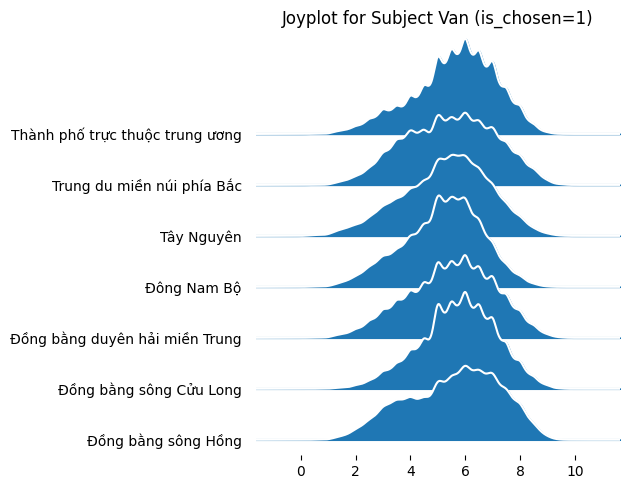

<Figure size 640x480 with 0 Axes>

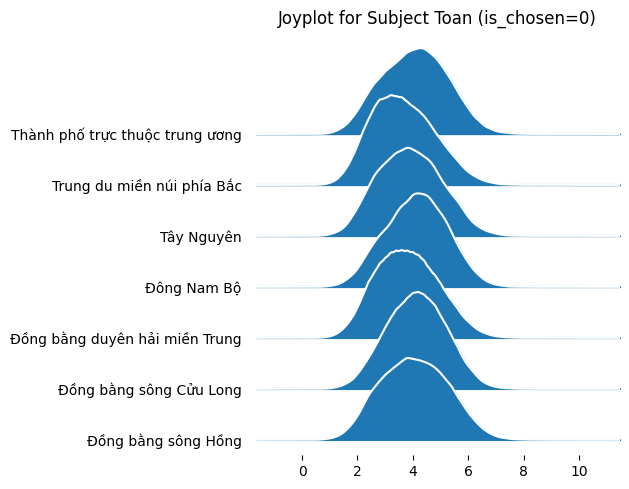

<Figure size 640x480 with 0 Axes>

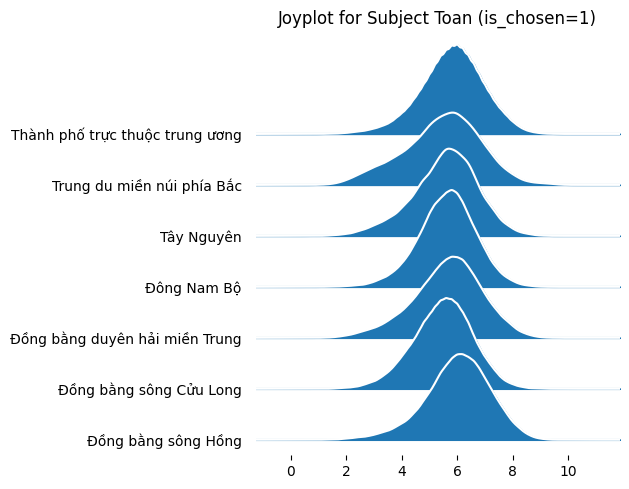

<Figure size 640x480 with 0 Axes>

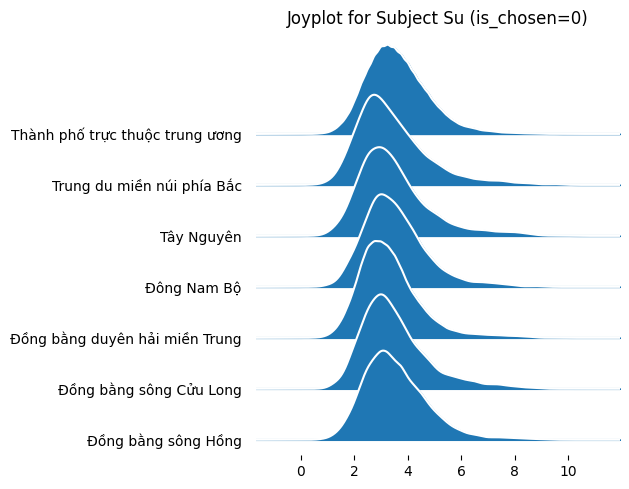

<Figure size 640x480 with 0 Axes>

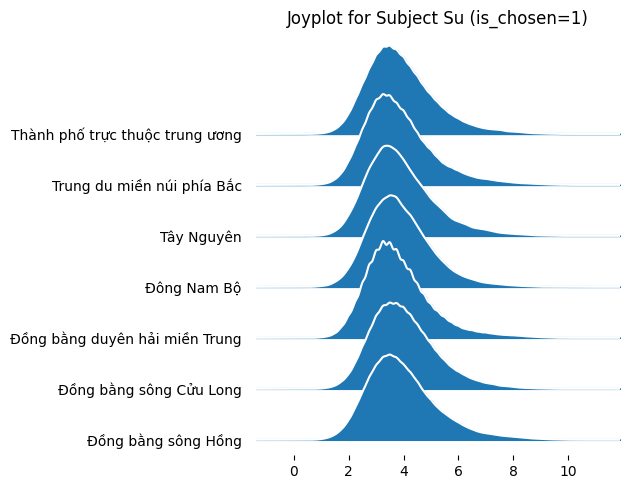

<Figure size 640x480 with 0 Axes>

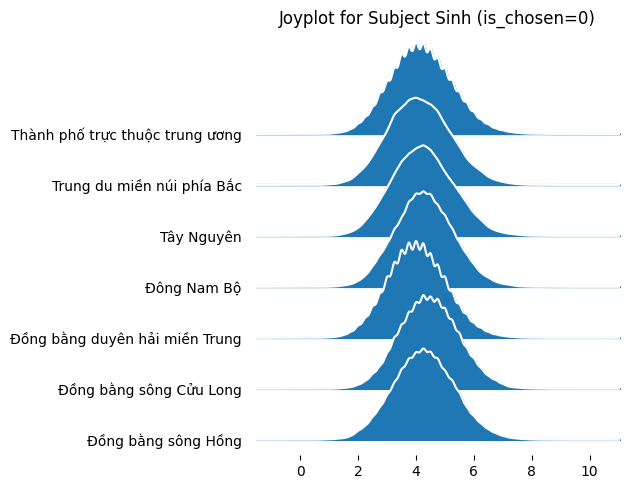

<Figure size 640x480 with 0 Axes>

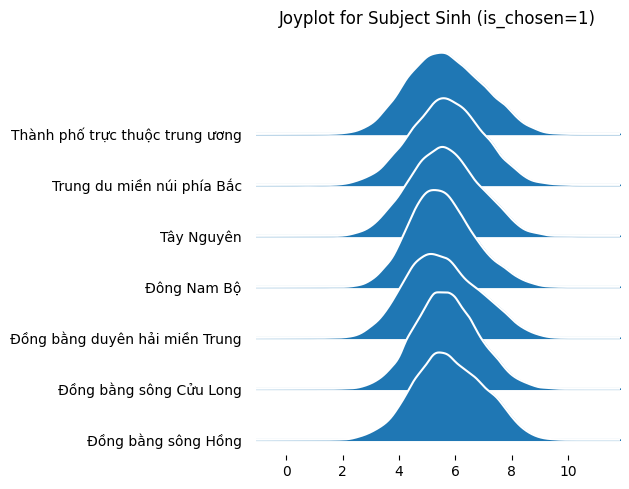

<Figure size 640x480 with 0 Axes>

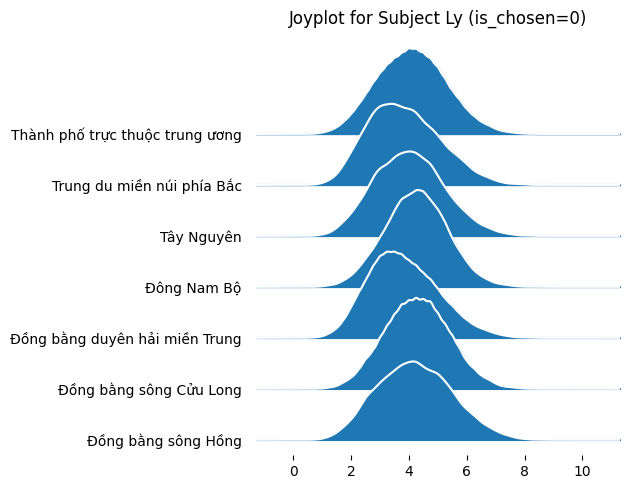

<Figure size 640x480 with 0 Axes>

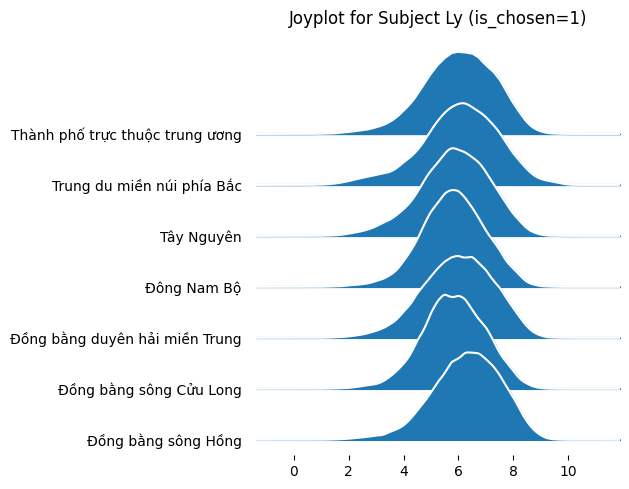

<Figure size 640x480 with 0 Axes>

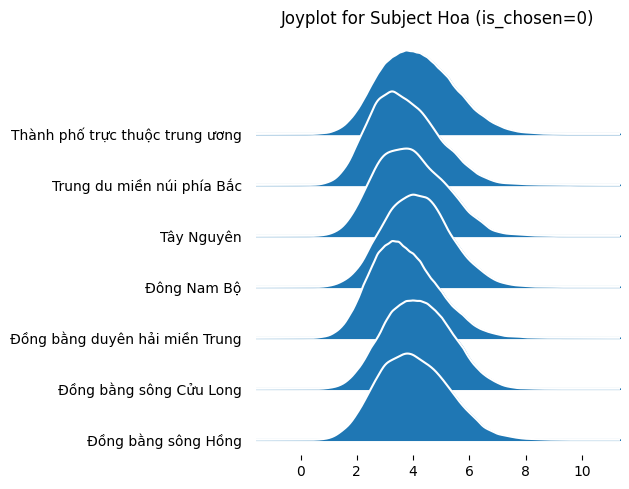

<Figure size 640x480 with 0 Axes>

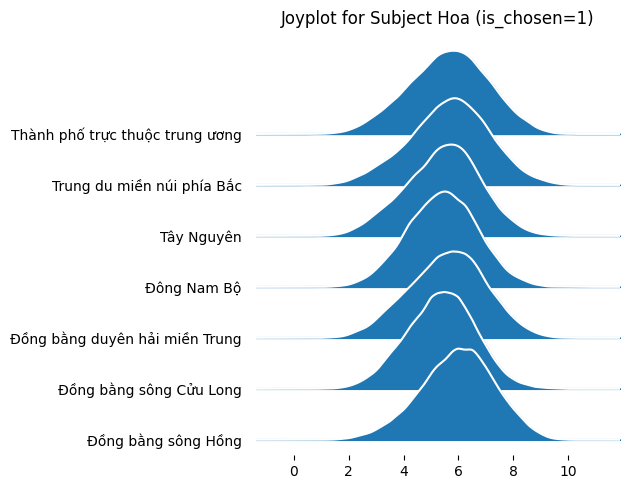

<Figure size 640x480 with 0 Axes>

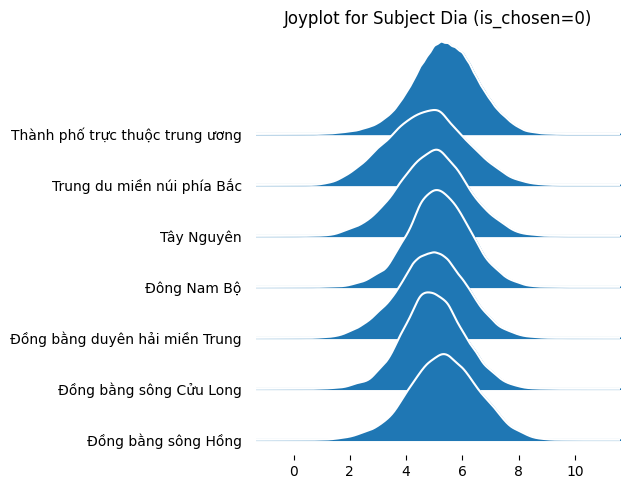

<Figure size 640x480 with 0 Axes>

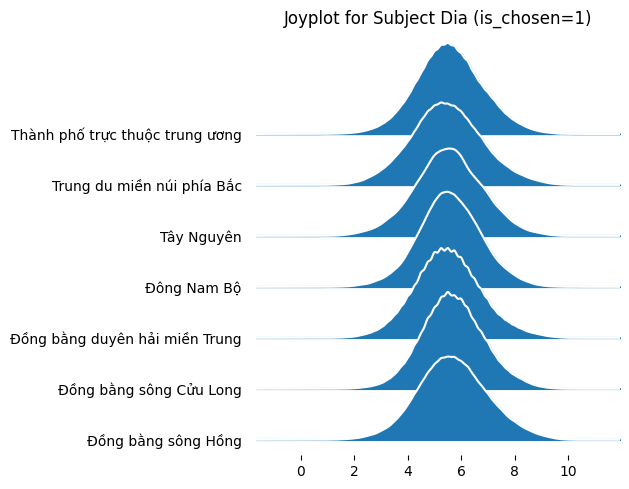

<Figure size 640x480 with 0 Axes>

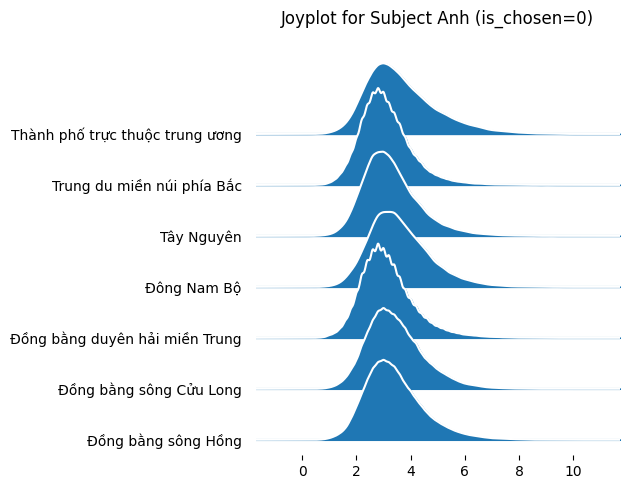

<Figure size 640x480 with 0 Axes>

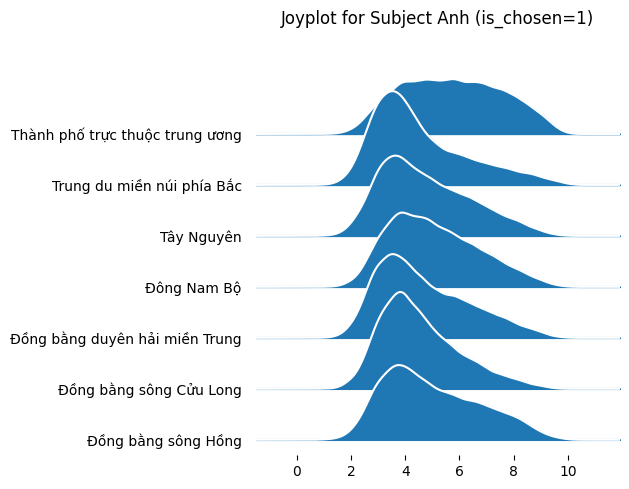

<Figure size 640x480 with 0 Axes>

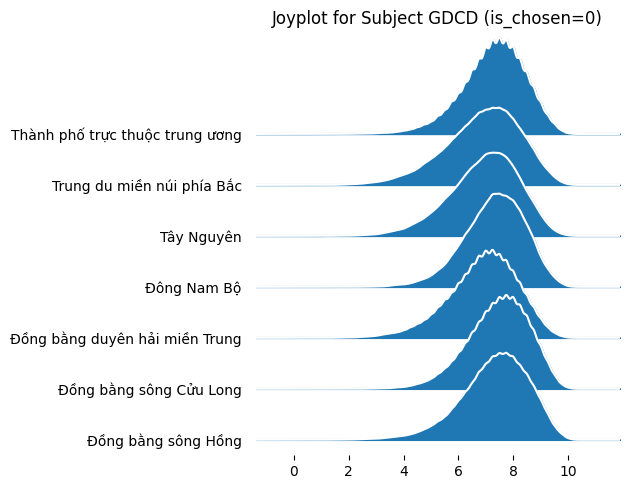

In [ ]:
for i in merged_df.subject_id.unique().tolist():
    for j in [0,1]:
        if i == 'GDCD' and j == 1:
            continue      
        filtered_df = merged_df[(merged_df.subject_id == i) & (merged_df.is_chosen == j)]
        # is_chosen: đây có phải là môn để xét tuyển hay không?
        plt.figure()
        fig, ax = joypy.joyplot(filtered_df, by = "region", column = "score", linecolor = "white")
        #joypy.joyplot() là hàm từ thư viện joypy để vẽ biểu đồ Joyplot. Joyplot là một dạng biểu đồ phân phối dạng đường
        #by = "region": Chỉ định nhóm dữ liệu 'region' để chia nhỏ
        plt.title(f"Joyplot for Subject {i} (is_chosen={j})")
        plt.show()

In [ ]:
# Group by 'candidate_id' and concatenate 'subject_id' values as a comma-separated string
d = merged_df.groupby('candidate_id')['subject_id'].apply(lambda x: ','.join(x.astype(str))).reset_index()
#groupby: Chia thành các nhóm theo candidate_id; 
#lambda x: Hàm ẩn danh nhận từng nhóm (x) là cột subject_id của mỗi candidate_id.
#x.astype(str): Chuyển giá trị trong cột subject_id (nếu là dạng khác, như số) sang kiểu chuỗi.
#','.join(str): Nối tất cả các giá trị trong cột subject_id của nhóm thành một chuỗi duy nhất, ngăn cách bởi dấu phẩy.
#reset_index() đặt lại chỉ mục, biến candidate_id thành một cột bình thường.

# Count the number of 'subject_id' entries per 'candidate_id'
t = merged_df.groupby('candidate_id')['subject_id'].count().reset_index()

# Merge the two DataFrames on 'candidate_id'
sub_inf = pd.merge(d, t, on='candidate_id')
#Tham số on='candidate_id' chỉ định rằng việc ghép nối (merge) hai DataFrame d và t sẽ dựa trên cột có tên candidate_id.

# Rename columns for clarity
sub_inf.columns = ['candidate_id', 'subject_ids', 'subject_count']

# Display the first 5 rows of the resulting DataFrame
sub_inf.head(5)

,candidate_id,subject_ids,subject_count
0,1000019,"Van,Su,Dia,Toan,GDCD,Anh",6
1,1000020,"Van,Toan,Anh,Su,GDCD,Dia",6
2,1000021,"Van,Toan,Anh,Su,GDCD,Dia",6
3,1000022,"Van,Toan,Anh,Su,GDCD,Dia",6
4,1000023,"Van,Toan,Anh,Su,GDCD,Dia",6


In [ ]:
# Count total candidates by region and subject_id, excluding 'GDCD'
total_candidates = merged_df.groupby(['region', 'subject_id'])['candidate_id'].count().reset_index()
total_candidates.rename(columns={'candidate_id': 'total_candidates'}, inplace=True)
#inplace=True: Thực hiện thay đổi trực tiếp trên DataFrame total_candidates mà không tạo ra một bản sao mới.
total_candidates = total_candidates[total_candidates['subject_id'] != 'GDCD']

# Count subjects by region where is_chosen equals 1
subject_count_by_region_chosen = merged_df[merged_df['is_chosen'] == 1].groupby(['er_code', 'region', 'subject_id'])['candidate_id'].count().reset_index()
subject_count_by_region_chosen.rename(columns={'candidate_id': 'total_candidates_chosen'}, inplace=True)

# Merge the two DataFrames on 'region' and 'subject_id'
df = pd.merge(total_candidates, subject_count_by_region_chosen, on=['region', 'subject_id'])

# Calculate the percentage of chosen candidates
df['percentage'] = round((df['total_candidates_chosen'] / df['total_candidates']) * 100, 2)

# Display the first 5 rows of the resulting DataFrame
df.head(5)

,region,subject_id,total_candidates,er_code,total_candidates_chosen,percentage
0,Thành phố trực thuộc trung ương,Anh,176221,1,85233,48.37
1,Thành phố trực thuộc trung ương,Dia,104026,1,64035,61.56
2,Thành phố trực thuộc trung ương,Hoa,101398,1,49272,48.59
3,Thành phố trực thuộc trung ương,Ly,99230,1,49766,50.15
4,Thành phố trực thuộc trung ương,Sinh,99448,1,20186,20.30


In [ ]:
import plotly.express as px
import pandas as pd
fig = px.line_polar(df, r = 'percentage', theta = 'subject_id', line_close = True, color   = 'region')
#line_close=True giúp kết nối điểm cuối với điểm đầu của đường (vòng tròn), tạo ra một đường kín.
# Điều này hữu ích khi bạn muốn tạo một vòng khép kín, giúp dễ dàng so sánh các phần trong vòng tròn.
#plt.savefig("new12.png",dpi=400) 
fig.show()

In [12]:
outliers = {}

In [ ]:
# TOO COMPLEX!!!

# subject_name = 'Toan'
# outliers = {}

# for er_code in range(1, 8):  # Regions 1 to 7
#     # Filter data for the specific subject, region, and is_chosen == 0
#     data = merged_df[(merged_df.subject_id == subject_name) & 
#                      (merged_df.is_chosen == 0) & 
#                      (merged_df.er_code == er_code)]['score']
    
#     # Calculate Q3, IQR, and upper fence
#     Q3 = np.percentile(data, 75)
#     IQR = iqr(data)
#     upper_fence = round(Q3 + 1.5 * IQR, 2)
    
#     # Filter data for scores above the upper fence
#     df = merged_df[(merged_df.subject_id == subject_name) & 
#                    (merged_df.is_chosen == 0) & 
#                    (merged_df.er_code == er_code) & 
#                    (merged_df.score >= upper_fence)]
    
#     # Iterate over unique province names in the filtered data
#     for province in df.province_name.unique().tolist():
#         df_tmp = merged_df[(merged_df.subject_id == subject_name) & 
#                            (merged_df.is_chosen == 0) & 
#                            (merged_df.province_name == province) & 
#                            (merged_df.score >= upper_fence)]
        
#         # Check the subject count for each candidate
#         for candidate_id in df_tmp['candidate_id']:
#             subject_count = int(sub_inf[sub_inf.candidate_id == candidate_id]['subject_count'].to_string(index=False, header=False))
#             if subject_count < 6:
#                 subject_ids = sub_inf[sub_inf.candidate_id == candidate_id]['subject_ids'].to_string(index=False, header=False)
#                 score = merged_df[(merged_df.candidate_id == candidate_id) & 
#                                   (merged_df.subject_id == subject_name)]['score'].to_string(index=False, header=False)
#                 outliers[subject_name] = [subject_ids, score]

# # Display the outliers dictionary
# print(outliers)

{'Toan': ['Van,Toan,Su', '7.2']}


### Điểm khối thi

In [ ]:
df_block_score = pd.read_csv('vnhsge-2018_block_score.csv')

# Extract province code from candidate_id
df_block_score['province_code'] = df_block_score['candidate_id'].apply(extract_prefix)

# Merge with province and region data
merged_df_block = pd.merge(df_block_score, df_pe, on='province_code', how='inner')
#how='inner' (mặc định): Chỉ giữ các dòng có rpovince_code xuất hiện ở cả hai DataFrame.

# Select relevant columns
merged_df_block = merged_df_block[['candidate_id', 'block_id', 'score', 'province_name', 'er_code', 'region']]

merged_df_block.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'vnhsge-2018_block_score.csv'

In [ ]:
block_count_by_region = merged_df_block.groupby(['er_code','region','block_id'])['candidate_id'].count().reset_index()
tmp = block_count_by_region.groupby('block_id')['candidate_id'].sum().reset_index()
block_count_by_region = pd.merge(block_count_by_region,tmp,on='block_id')
block_count_by_region['percentage'] = round(block_count_by_region['candidate_id_x']/block_count_by_region['candidate_id_y']*100,2)
#candidate_id_y (tổng số thí sinh của mỗi khối thi); cột candidate_id_x (số thí sinh theo từng vùng miền và khối thi).
block_count_by_region

,er_code,region,block_id,candidate_id_x,candidate_id_y,percentage
0,1,Thành phố trực thuộc trung ương,A00,30679,133927,22.91
1,2,Đồng bằng sông Hồng,A00,23401,133927,17.47
2,3,Trung du miền núi phía Bắc,A00,8203,133927,6.12
3,4,Đồng bằng duyên hải miền Trung,A00,31185,133927,23.29
4,5,Tây Nguyên,A00,9048,133927,6.76
5,6,Đông Nam Bộ,A00,13363,133927,9.98
6,7,Đồng bằng sông Cửu Long,A00,18048,133927,13.48
7,1,Thành phố trực thuộc trung ương,A01,19306,46574,41.45
8,2,Đồng bằng sông Hồng,A01,5256,46574,11.29
9,3,Trung du miền núi phía Bắc,A01,1819,46574,3.91


In [ ]:
import plotly.express as px
import pandas as pd

           
fig = px.line_polar(block_count_by_region, r = 'percentage', theta = 'block_id', line_close = True, color   = 'region')
#fig.update_traces(fill = 'toself')
plt.savefig("new12.png",dpi=400) 
#Lưu biểu đồ vào file new12.png, độ phân giải dpi=400
fig.show()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version

<Figure size 432x288 with 0 Axes>

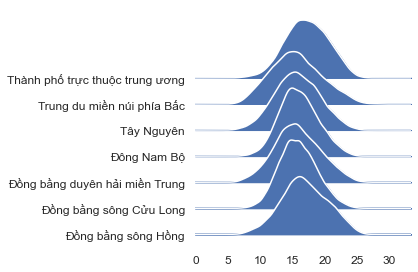

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import joypy

fig, ax = joypy.joyplot(merged_df_block[merged_df_block.block_id == 'D01'], by = "region", column = "score", linecolor = "white")
plt.savefig("new25.png",dpi=400) 
# plt.show()

In [ ]:
df_0 = pd.read_csv('vnhsge-2018_zero.csv')
df_0['avg_score'] = df_0['avg_score'].fillna(0)
#df_0

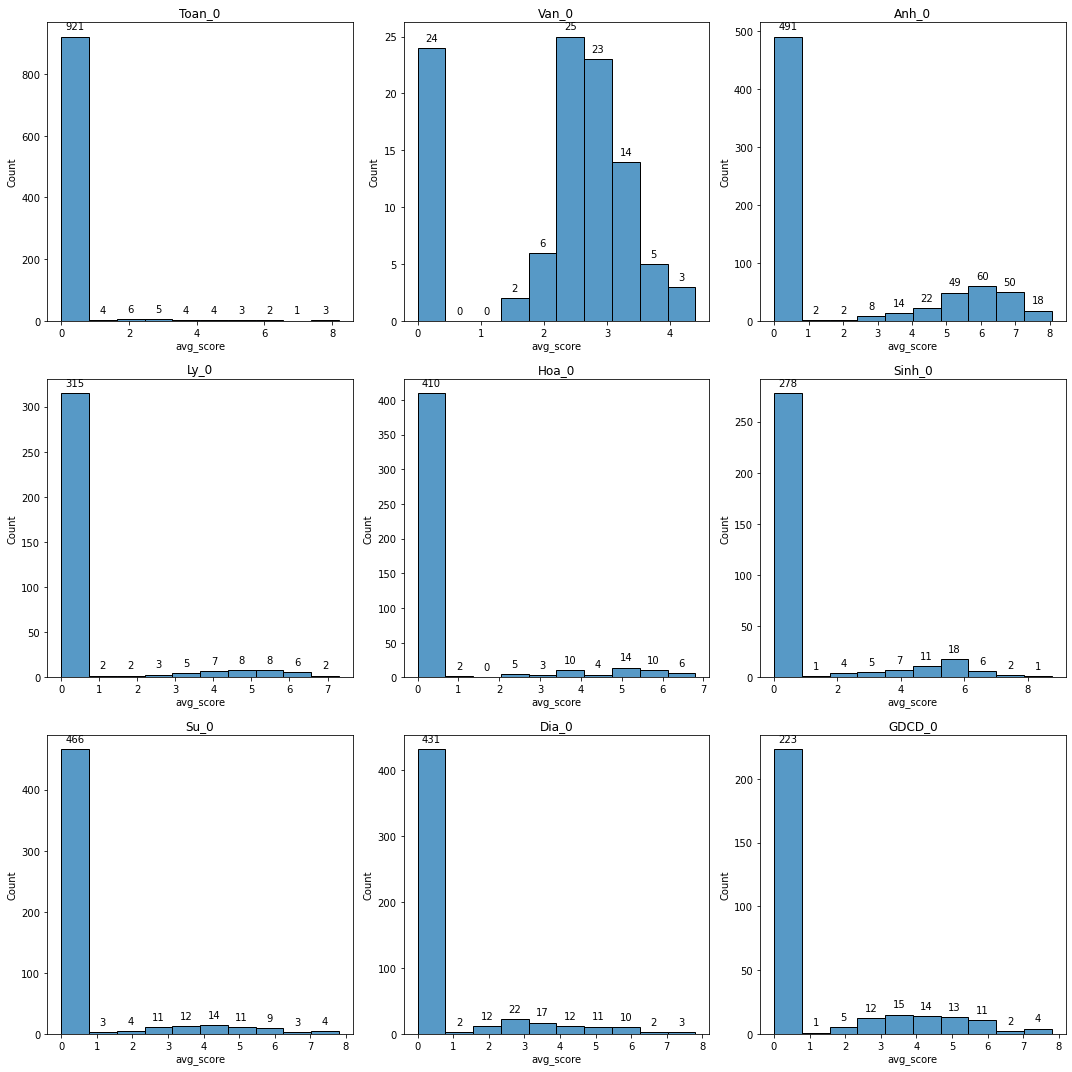

In [ ]:
# fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # List of subject IDs
# subjects = ["Toan_0", "Van_0", "Anh_0", "Ly_0", "Hoa_0", "Sinh_0", "Su_0", "Dia_0", "GDCD_0"]

# # Iterate over each subject ID and plot the corresponding histogram
# for i, subject in enumerate(subjects):
#     ax = sns.histplot(data=df_0[df_0[subject] == 1], x="avg_score", ax=axes[i], bins=10)
#     axes[i].set_title(subject)
#     # Đặt nhãn số cho từng cột của biểu đồ
#     for p in ax.patches:
#         ax.annotate(format(p.get_height(), '.0f'), 
#                        (p.get_x() + p.get_width() / 2., p.get_height()), 
#                        ha = 'center', va = 'center', 
#                        xytext = (0, 10), 
#                        textcoords = 'offset points')

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.savefig("c10.png",dpi=400) 
# # Show plot
# plt.show()

### Biểu đồ 2. Mối quan hệ giữa điểm trung bình và chênh lệch điểm của nhóm thí sinh THPT

In [ ]:
df_grad = pd.read_csv('vnhsge-2018_avg.csv')
df_grad

,candidate_id,avg_score,subject_group,count_5,avg_score_1,count_score_1,avg_score_0,count_score_0,score_range
0,1000019,5.60,KHXH,4,5.58,3,5.62,3,2.45
1,1000020,7.35,KHXH,6,7.35,3,6.58,3,2.50
2,1000021,6.67,KHXH,5,6.67,3,6.08,3,4.25
3,1000022,7.30,KHXH,5,7.30,3,6.92,3,4.65
4,1000023,6.45,KHXH,4,6.45,3,5.75,3,3.80
...,...,...,...,...,...,...,...,...,...
805491,64006212,6.22,KHXH,5,6.25,3,6.05,3,4.75
805492,64006213,6.85,KHTN,4,6.85,3,4.42,3,5.00
805493,64006214,6.08,KHTN,5,6.11,4,6.02,2,4.45
805494,64006215,5.50,KHTN,4,6.60,3,4.40,3,4.80


In [ ]:
def round_to_nearest_half(x):
    return np.round(x * 2) / 2

In [ ]:
df_tmp = df_grad.copy()
df_tmp['score_range'] = df_tmp['score_range'].apply(round_to_nearest_half)
df_tmp['avg_score'] = df_tmp['avg_score'].apply(round_to_nearest_half)

<Figure size 576x432 with 0 Axes>

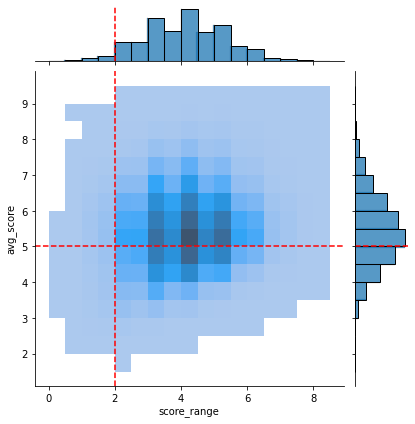

In [ ]:
# Create JointGrid
plt.figure(figsize=(8, 6))
#figsize=(8, 6): Xác định kích thước của biểu đồ là 8 inch x 6 inch.
g =  sns.jointplot(data=df_tmp, x="score_range", y="avg_score", kind="hist",binwidth=0.5)
#sns.jointplot(): Đây là hàm trong seaborn để vẽ biểu đồ kết hợp, cho phép hiển thị mối quan hệ giữa hai biến trong không gian 2 chiều, cùng với các biểu đồ biên (marginal plots) của mỗi biến.
#kind="hist": Chỉ định loại biểu đồ trong jointplot. 
#Ở đây, "hist" có nghĩa là sử dụng biểu đồ histogram để trực quan hóa phân phối của các giá trị score_range và avg_score.
#binwidth=0.5: Chỉ định độ rộng của các hộp trong biểu đồ histogram. Ở đây là 0.5, nghĩa là mỗi hộp trong histogram sẽ có độ rộng là 0.5.
g.plot_marginals(sns.histplot,binwidth=0.5)
# Scatter plo
# Additional formatting
g.refline(x=2, y=5,color='red')
#g.refline(x=2, y=5, color='red'): Đây là một phương thức dùng để vẽ một đường tham chiếu (reference line) trên biểu đồ.
plt.savefig("c13.png",dpi=400) 
plt.show()

### Biểu đồ 3,4. Phân phối điểm thi theo 2 nhóm môn

### Biểu đồ 6. Tổng và phần trăm tích lũy theo điểm trung bình

In [ ]:
data = []
i = 0
while i <= 10:
    x = len(df_grad[df_grad['avg_score'] >= i])
    y = len(df_grad)
    percent = round(x/y,3)*100
    #x/y: Tính tỷ lệ thí sinh có điểm trung bình lớn hơn hoặc bằng i so với tổng số thí sinh
    data.append((i, x, percent))
    #Lưu kết quả vào danh sách data, mỗi phần tử là một tuple chứa:
    #i: Điểm trung bình bắt đầu.
    #x: Số lượng thí sinh có điểm trung bình lớn hơn hoặc bằng i.
    #percent: Tỷ lệ phần trăm thí sinh có điểm trung bình lớn hơn hoặc bằng i.
    #print(i,":",x,"/",y,"(",percent,")")
    i += 0.25
new_df = pd.DataFrame(data, columns=['score', 'count', 'percent'])
#new_df

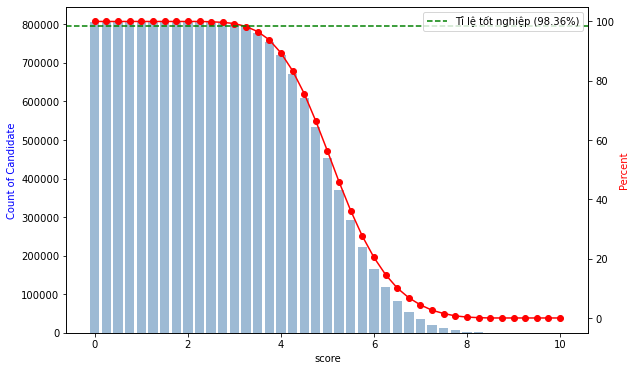

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
#fig, ax1 = plt.subplots(figsize=(10, 6)): Tạo một đối tượng Figure và một trục chính ax1.
#figsize=(10, 6): Xác định kích thước của biểu đồ là 10 inch x 6 inch.
#ax1: Là trục chính (primary axis) dùng để vẽ biểu đồ cột.

# Create bar plot on primary axis
ax1.bar(new_df['score'], new_df['count'], width = 0.2,color='#0b5394', alpha=0.4)
#Vẽ biểu đồ cột (bar plot) với:
#new_df['score']: Trục X là các giá trị điểm số (score).
#new_df['count']: Trục Y là số lượng thí sinh (count).
#width=0.2: Độ rộng của mỗi cột trong biểu đồ.
#color='#0b5394': Màu sắc của các cột là #0b5394 (màu xanh dương đậm).
#alpha=0.4: Đặt độ trong suốt của cột, ở đây là 40% trong suốt.
ax1.set_xlabel('score')
ax1.set_ylabel('Count of Candidate', color='blue')

# Create a secondary axis for the line plot
ax2 = ax1.twinx()
#ax2 = ax1.twinx(): Tạo một trục phụ (ax2) chia sẻ trục X với ax1, nhưng có trục Y riêng biệt. Điều này cho phép vẽ hai biểu đồ với trục Y khác nhau.
ax2.plot(new_df['score'], new_df['percent'], color='red', marker='o')
ax2.set_ylabel('Percent', color='red')

# Add grid for both axes
ax1.grid(False)
ax2.grid(False)
#ax1.grid(False) và ax2.grid(False): Tắt lưới (grid) cho cả trục chính và trục phụ.
fig.subplots_adjust(right=0.85)
#fig.subplots_adjust(right=0.85): Điều chỉnh không gian bên phải của biểu đồ. Đây là một cách để giảm không gian thừa bên phải biểu đồ và giúp biểu đồ trở nên chặt chẽ hơn. 
# 85% là phần không gian được sử dụng trong chiều ngang của Figure.

ax2.axhline(y=98.36, color='green', linestyle='--', label='Tỉ lệ tốt nghiệp (98.36%)')
#axhline(y=98.36): Thêm một đường ngang (horizontal line) tại y=98.36, thể hiện tỷ lệ tốt nghiệp.
ax2.legend(loc='upper right')
# Add title, ax2.legend(loc='upper right'): Hiển thị legend (chú thích) cho trục Y phụ. Vị trí của legend là ở góc trên bên phải (upper right).
plt.savefig("c14.png",dpi=300) 
plt.show()

### Biểu đồ 7. Biểu đồ boxplot so sánh điểm khối thi lớn nhất và điểm môn thi thấp nhất

### Phổ điểm môn thi & khối thi

In [ ]:
df_tmp_1 = pd.read_csv('vnhsge-2018_score_1.csv')
df_tmp_2 = pd.read_csv('vnhsge-2018_score_2.csv')
df_score = pd.merge(df_tmp_1, df_tmp_2, how='outer')
#how='outer': Thực hiện nối ngoài (outer join) giữa hai DataFrame, tức là giữ tất cả các dòng từ cả hai DataFrame, bất kể liệu có giá trị khớp ở cột khóa hay không.
df_score = df_score.drop_duplicates()
df_score = df_score.sort_values(by=['is_chosen','subject_id'],ascending=False)
df_score = df_score[df_score['score'] > 0]
df_score

,candidate_id,subject_id,score,is_chosen
5,1000019,Van,5.75,1
11,1000020,Van,8.25,1
17,1000021,Van,8.00,1
23,1000022,Van,6.50,1
29,1000023,Van,6.75,1
...,...,...,...,...
5391039,64006209,Anh,2.80,0
5391045,64006210,Anh,3.00,0
5391057,64006212,Anh,5.00,0
5391069,64006214,Anh,3.80,0


In [ ]:
df_block_score = pd.read_csv('vnhsge-2018_block_score.csv')
df_block_score

,candidate_id,block_id,score
0,1000019,C00,16.75
1,1000020,D01,22.05
2,1000021,D01,20.00
3,1000022,D01,21.90
4,1000023,D01,19.35
...,...,...,...
921980,64006213,D01,20.55
921981,64006214,A00,18.45
921982,64006214,B00,18.45
921983,64006215,A00,19.80


In [ ]:
for i in df_score['subject_id'].unique():
#df_score['subject_id'].unique(): Lấy danh sách các giá trị duy nhất trong cột subject_id, là các môn học.
    if i != 'GDCD':
        df = df_score[(df_score['subject_id'] == i) & (df_score['is_chosen'] == 1)]
        num_rows = len(df)
        #len(df): Đếm số lượng thí sinh trong nhóm df, tức là số lượng thí sinh có môn học là i và điểm được chọn.
        mean = round(np.mean(df['score']),2)
        #np.mean(df['score']): Tính giá trị trung bình (mean) của điểm thi (score) trong nhóm df.
        std_dev = round(np.std(df['score']),2)
        #Tính độ lệch chuẩn (standard deviation) của điểm thi (score) trong nhóm df.
        percent_below_5 = round(len(df[df['score'] < 5]) / len(df) * 100,2)
        #Tính tỷ lệ thí sinh có điểm dưới 5
    print(i,num_rows,mean,std_dev,percent_below_5)

Van 651145 5.53 1.55 31.24
Toan 483116 5.7 1.18 23.15
Su 423166 3.89 1.23 81.58
Sinh 87394 5.64 1.24 27.94
Ly 179753 6.0 1.26 18.1
Hoa 213524 5.61 1.37 29.3
Dia 423166 5.57 1.25 28.79
Anh 272236 5.06 1.77 52.4


In [ ]:
for i in df_score['subject_id'].unique():
    df = df_score[(df_score['subject_id'] == i) & (df_score['is_chosen'] == 0)]
    num_rows = len(df)
    mean = round(np.mean(df['score']),2)
    std_dev = round(np.std(df['score']),2)
    percent_below_5 = round(len(df[df['score'] < 5]) / len(df) * 100,2)
    print(i,num_rows,mean,std_dev,percent_below_5)

Van 250481 5.25 1.24 35.09
Toan 433399 3.92 1.15 79.15
Su 142076 3.5 1.22 88.15
Sinh 295904 4.22 1.04 73.76
Ly 206978 4.08 1.18 74.57
Hoa 175752 4.0 1.23 76.24
Dia 125642 5.13 1.22 41.03
Anh 543966 3.34 1.08 91.39
GDCD 479104 7.13 1.24 4.88


In [ ]:
for i in df_block_score['block_id'].unique():
    df = df_block_score[df_block_score['block_id'] == i]
    num_rows = len(df)
    mean = round(np.mean(df['score']),2)
    std_dev = round(np.std(df['score']),2)
    print(i,num_rows,mean,std_dev)

C00 423166 14.67 3.31
D01 230924 16.34 3.4
B00 87394 16.65 3.42
A01 46574 18.5 3.6
A00 133927 17.82 3.19
